# Customer Life Time Value

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('OnlineRetail.xlsx')
df.head(2)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [2]:
df.shape

(541909, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
# Remove quantities that are less than 0 (possibly returned items)
df = df.loc[df['Quantity'] > 0]

In [6]:
# Remove blank customer IDs
df = df[pd.notnull(df['CustomerID'])]

In [7]:
# View our data range
print('Date Range: %s to %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [8]:
# taking all of the transactions that occurred before December 01, 2011 
df = df.loc[df['InvoiceDate'] < '2011-12-01']

In [9]:
# Create a Sales Revenue Column
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [10]:
# Get a orders summary dataset that shows the total in sales made per customer invoice
orders_df = df.groupby(['CustomerID', 'InvoiceNo']).agg({'Sales': sum,'InvoiceDate': max})

In [11]:
orders_df.head(10)

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
           562032       584.91 2011-08-02 08:48:00
           573511      1294.32 2011-10-31 12:25:00
12348.0    539318       892.80 2010-12-16 19:09:00
           541998       227.44 2011-01-25 10:42:00
           548955       367.00 2011-04-05 10:47:00

In [12]:
# Create some simple functions we'll be using to create our summary dataframe

def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    '''returns the average days between sales'''
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_df = orders_df.reset_index().groupby('CustomerID').agg({
    'Sales': [min, max, sum, groupby_mean, groupby_count],
    'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

In [13]:
summary_df.head(10)

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000   1.0   
12347.0       382.52   1294.32   4085.18    680.863333   6.0   
12348.0       227.44    892.80   1797.24    449.310000   4.0   
12349.0      1757.55   1757.55   1757.55   1757.550000   1.0   
12350.0       334.40    334.40    334.40    334.400000   1.0   
12352.0       120.33    840.30   2506.04    313.255000   8.0   
12353.0        89.00     89.00     89.00     89.000000   1.0   
12354.0      1079.40   1079.40   1079.40   1079.400000   1.0   
12355.0       459.40    459.40    459.40    459.400000   1.0   
12356.0        58.35   2271.62   2811.43    937.143333   3.0   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
12352.0    2011-02-16 12:33:00 2011-11-03 14:37:00               260   
12353.0    2011-05-19 17:47:00 2011-05-19 17:47:00                 0   
12354.0    2011-04-21 13:11:00 2011-04-21 13:11:00                 0   
12355.0    2011-05-09 13:49:00 2011-05-09 13:49:00                 0   
12356.0    2011-01-18 09:50:00 2011-11-17 08:40:00               302   

                               
           purchase_frequency  
CustomerID                     
12346.0              0.000000  
12347.0             54.500000  
12348.0             70.500000  
12349.0              0.000000  
12350.0              0.000000  
12352.0             32.500000  
12353.0              0.000000  
12354.0              0.000000  
12355.0              0.000000  
12356.0            100.666667

In [14]:
# Rename our columns by combinng it with the top row
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [15]:
summary_df.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1.0,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.0
12347.0,382.52,1294.32,4085.18,680.863333,6.0,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.5
12348.0,227.44,892.80,1797.24,449.310000,4.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.5
12349.0,1757.55,1757.55,1757.55,1757.550000,1.0,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.0
12350.0,334.40,334.40,334.40,334.400000,1.0,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.0


## Visualization 

In [16]:
# Let's look at the first 20 sales counts and the average spend for that sale

# We first, group by Sales_Counts and then look at the sales_avg 
summary_df.groupby('sales_count').count()['sales_avg'][:20]

sales_count
1.0     1539
2.0      806
3.0      515
4.0      381
5.0      228
6.0      172
7.0      132
8.0       97
9.0       60
10.0      45
11.0      54
12.0      47
13.0      29
14.0      19
15.0      24
16.0      13
17.0      15
18.0      11
19.0      15
20.0      10
Name: sales_avg, dtype: int64

In [17]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]
summary_df

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,382.52,1294.32,4085.18,680.863333,6.0,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4.0,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12352.0,120.33,840.30,2506.04,313.255000,8.0,2011-02-16 12:33:00,2011-11-03 14:37:00,260,32.500000
12356.0,58.35,2271.62,2811.43,937.143333,3.0,2011-01-18 09:50:00,2011-11-17 08:40:00,302,100.666667
12359.0,547.50,2876.85,6372.58,1593.145000,4.0,2011-01-12 12:43:00,2011-10-13 12:47:00,274,68.500000
12360.0,534.70,1083.58,2662.06,887.353333,3.0,2011-05-23 09:43:00,2011-10-18 15:22:00,148,49.333333
12362.0,303.76,829.99,4697.19,521.910000,9.0,2011-02-17 10:30:00,2011-11-04 09:07:00,259,28.777778
12363.0,252.90,299.10,552.00,276.000000,2.0,2011-04-11 13:29:00,2011-08-22 10:18:00,132,66.000000
12364.0,79.80,623.92,1002.78,334.260000,3.0,2011-08-19 15:24:00,2011-10-30 15:43:00,72,24.000000


Because we're trying to get the time between sales (plotted in the next cell). We need to eliminate single purchases. That's what this line does. 

`summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]`

Purchase durations that are equal to 0 indicate that only purchase was ever made.

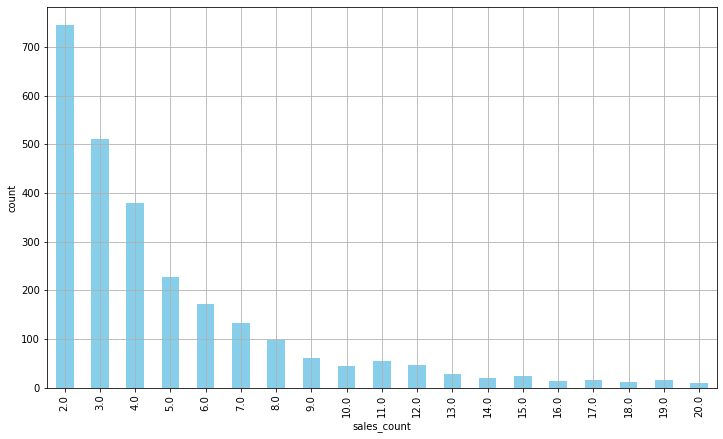

In [18]:
# We filter on invoicedate_purchase_duration greater than 0
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(kind='bar', color='skyblue',figsize=(12,7), grid=True)

ax.set_ylabel('count')

plt.show()

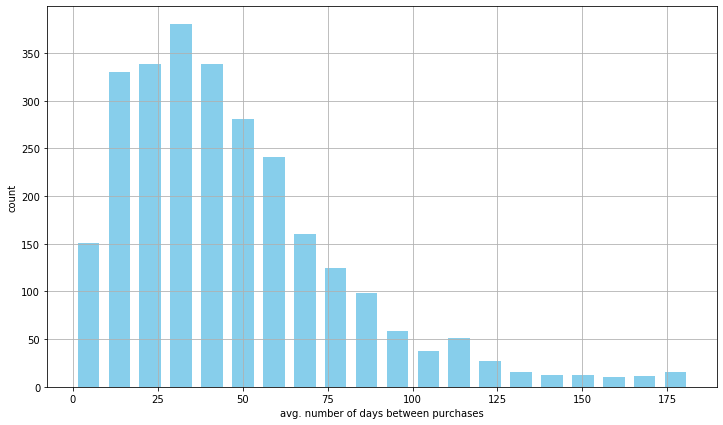

In [19]:
# Now we create a distribution for the average times between sales
ax = summary_df['invoicedate_purchase_frequency'].hist(bins=20, color='skyblue', rwidth=0.7, figsize=(12,7))

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

# Predicting the 3 month Customer Lifetime Value

In [20]:
orders_df.head()

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00

In [21]:
# Create summary statistics in 3 month intervals for customer Sales

# Use 3M for 3 month
clv_freq = '3M'

# Groupby customer ID now, and group all invoices for 3 month cycles.
# Aggregate on sum, mean and counts
data_df = orders_df.reset_index().groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq=clv_freq)]).agg({
    'Sales': [sum, groupby_mean, groupby_count],})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12346.0,2011-03-31,77183.60,77183.600,1.0
1,12347.0,2010-12-31,711.79,711.790,1.0
2,12347.0,2011-03-31,475.39,475.390,1.0
3,12347.0,2011-06-30,1018.77,509.385,2.0
4,12347.0,2011-09-30,584.91,584.910,1.0


In [22]:
# Adding Recency 'M'

# Get the M
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

# Create our M Column
data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12346.0,2011-03-31,77183.60,77183.600,1.0,M_4
1,12347.0,2010-12-31,711.79,711.790,1.0,M_5
2,12347.0,2011-03-31,475.39,475.390,1.0,M_4
3,12347.0,2011-06-30,1018.77,509.385,2.0,M_3
4,12347.0,2011-09-30,584.91,584.910,1.0,M_2


In [23]:
data_df['M'].unique()

array(['M_4', 'M_5', 'M_3', 'M_2', 'M_1'], dtype=object)

**RFM**

By definition, RFM represents:

- R(ecency): how recently did customer purchase?
- F(rquency): how often do customer purchase?
- M(onetary Value): how much do they spend (each time on average)?

In [24]:
# Create our Features DF
features_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='CustomerID')

features_df.columns = ['_'.join(col) for col in features_df.columns]

features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,
12346.0,NaN,NaN,77183.600,NaN,NaN,NaN,1.0,NaN,NaN,NaN,77183.60,NaN
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80
12350.0,NaN,NaN,334.400,NaN,NaN,NaN,1.0,NaN,NaN,NaN,334.40,NaN
12352.0,316.25,NaN,312.362,NaN,2.0,NaN,5.0,NaN,632.50,NaN,1561.81,NaN


In [25]:
# Create our Response DF
response_df = data_df.loc[data_df['M'] == 'M_1', ['CustomerID', 'sales_sum']]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]
response_df.head()

,CustomerID,CLV_3M
5,12347.0,1294.32
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67


In [26]:
# Create our Sample Set by merging features with response_df
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)
sample_set_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CustomerID,CLV_3M
9219,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,12346.0,0.00
5,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,12347.0,1294.32
9219,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,12348.0,0.00
9219,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,12350.0,0.00
14,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,12352.0,311.73


# Using Linear Regression

In [27]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Our Target Variable
target_var = 'CLV_'+clv_freq

# Our Features
all_features = [x for x in sample_set_df.columns if x not in ['CustomerID', target_var]]

# Split data in Train and Test
x_train, x_test, y_train, y_test = train_test_split(sample_set_df[all_features], sample_set_df[target_var], test_size=0.3)

# Fit Model
reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# Get our y intercept
reg_fit.intercept_

78.85362770747543

In [29]:
# Get our coefficents
reg_fit.coef_

array([   0.25339798,   -0.49727261,   -0.27786199,   -0.27978608,
        123.53112946,    7.85468635, -112.46971197, -142.79621822,
          0.19566892,    0.3236841 ,    0.29284897,    0.9451614 ])

In [30]:
# Show them here per feature
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,0.253398
1,sales_avg_M_3,-0.497273
2,sales_avg_M_4,-0.277862
3,sales_avg_M_5,-0.279786
4,sales_count_M_2,123.531129
5,sales_count_M_3,7.854686
6,sales_count_M_4,-112.469712
7,sales_count_M_5,-142.796218
8,sales_sum_M_2,0.195669
9,sales_sum_M_3,0.323684


In [31]:
# Run our input data into our model predictors
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [32]:
# Assess performance Training Data
from sklearn.metrics import r2_score, median_absolute_error

print(r2_score(y_true=y_train, y_pred=train_preds))
print(median_absolute_error(y_true=y_train, y_pred=train_preds))

0.7654477821180331
231.44733308707777


In [33]:
# Compare R-Squared Performance on Training and Test Datasets
print('In-Sample R-Squared: %0.4f' % r2_score(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true = y_test, y_pred = test_preds))

In-Sample R-Squared: 0.7654
Out-of-Sample R-Squared: 0.4532


In [34]:
# Compare MSE on Training and Test Datasets
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true = y_test, y_pred = test_preds))

In-Sample MSE: 231.4473
Out-of-Sample MSE: 219.9747


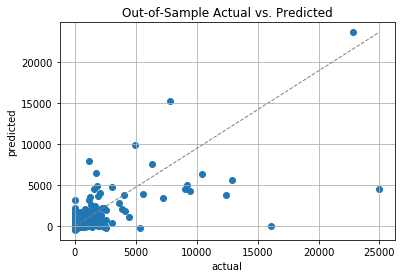

In [35]:
# Plot the predicted vs actual values using our Test Dataset
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()